<a href="https://colab.research.google.com/github/smabid2018/Blue_Fox/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


In [6]:
# Check for missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]

,0
director,2634
cast,825
country,831
date_added,10
rating,4
duration,3


In [10]:
# Fill missing values in 'director', 'cast', and 'country' with "Unknown"
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Drop rows with missing 'date_added', 'rating', and 'duration'
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

# Verify that there are no more missing values
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [11]:
# Count the number of shows released each year
shows_per_year = df['release_year'].value_counts().sort_index()

shows_per_year


,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1030
2018,1146
2019,1030


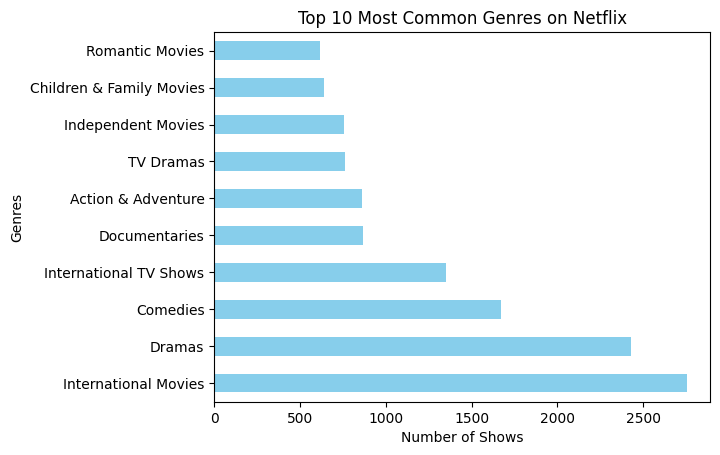

In [15]:
# Split the 'listed_in' column to count each genre separately
genres = df['listed_in'].str.split(', ')
all_genres = genres.explode().value_counts()

# Plotting the top 10 most common genres
top_10_genres = all_genres.head(10)
top_10_genres.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Shows')
plt.ylabel('Genres')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()

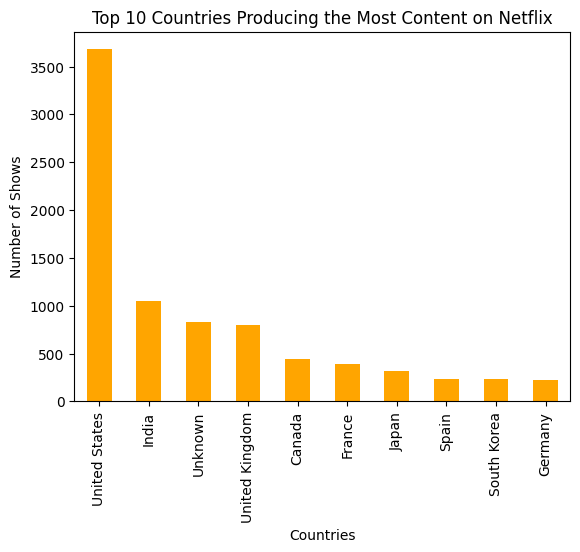

In [16]:
# Count the number of shows by country
country_count = df['country'].str.split(', ').explode().value_counts()

# Plotting the top 10 content-producing countries
top_10_countries = country_count.head(10)
top_10_countries.plot(kind='bar', color='orange')
plt.xlabel('Countries')
plt.ylabel('Number of Shows')
plt.title('Top 10 Countries Producing the Most Content on Netflix')
plt.show()

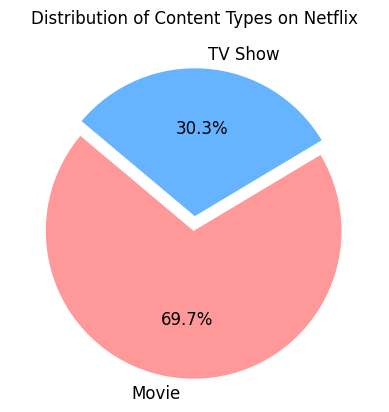

In [17]:
# Distribution of Content Types
content_type = df['type'].value_counts()

# Plotting the distribution of content types
content_type.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140, fontsize=12, explode=(0.1, 0))
plt.title('Distribution of Content Types on Netflix')
plt.ylabel('')  # This removes the default ylabel
plt.show()

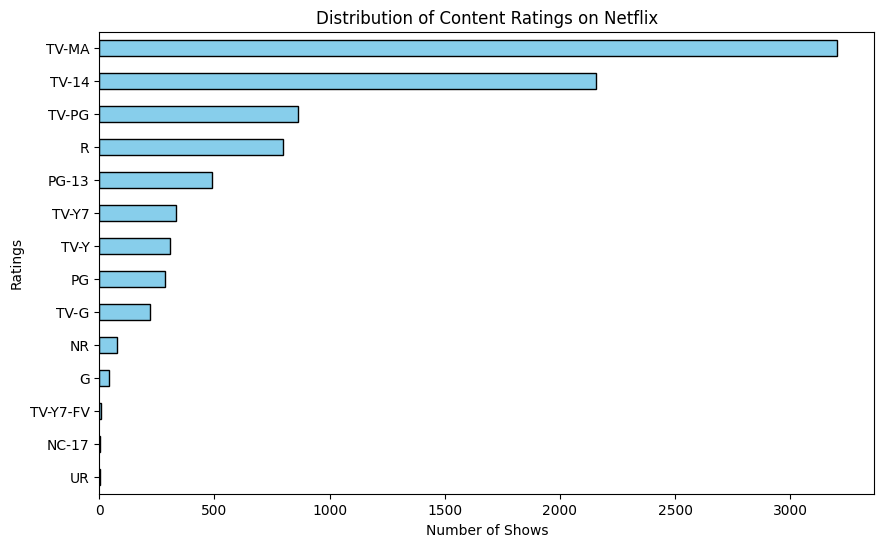

In [19]:
# Distribution of Ratings
ratings = df['rating'].value_counts()

# Plotting the distribution of ratings using a horizontal bar chart
plt.figure(figsize=(10, 6))
ratings.plot(kind='barh', color='skyblue', edgecolor='black')
plt.xlabel('Number of Shows')
plt.ylabel('Ratings')
plt.title('Distribution of Content Ratings on Netflix')
plt.gca().invert_yaxis()  # To display the highest bar at the top
plt.show()


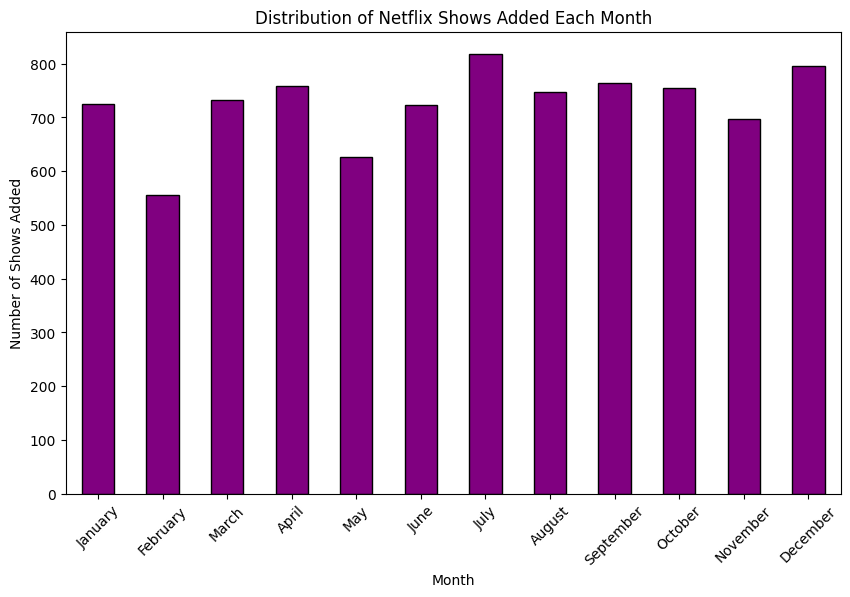

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'date_added' to datetime, coercing errors
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract the month name from the 'date_added' column
df['month_added'] = df['date_added'].dt.month_name()

# Define the order of months
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Create a categorical type with the specified order and use it to sort the values
df['month_added'] = pd.Categorical(df['month_added'], categories=month_order, ordered=True)

# Distribution of shows added each month, ensuring the order of categories is preserved
month_distribution = df['month_added'].value_counts(sort=False)

# Plotting the distribution of shows added each month
plt.figure(figsize=(10, 6))
month_distribution.plot(kind='bar', color='purple', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Shows Added')
plt.title('Distribution of Netflix Shows Added Each Month')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()
